In [7]:

import yfinance as yf
import pandas as pd
import numpy as np
import plotly 
import plotly.express as px
from matplotlib import pyplot as plt
from finta import TA
import hvplot.pandas
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [8]:
# ticker_list = ['AGG','VTI', 'VOO', 'QQQ', 'XLE', 'IWM', 'IYY', 'XLF', 'UUP', 'DJT', 'GSG']
btfd_ticker = ['OLLI']
spy_baseline = ['SPY']

In [12]:
df_btfd = yf.download(btfd_ticker,period='5y')
df_btfd = df_btfd.drop(labels='Adj Close', axis=1)
df_btfd.columns

df_baseline = yf.download(spy_baseline,period='5y')
df_baseline = df_baseline.drop(labels='Adj Close', axis=1)
df_baseline.columns
df_baseline

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-03-13,237.619995,237.860001,237.240005,237.809998,57256800
2017-03-14,237.179993,237.240005,236.190002,236.899994,59880800
2017-03-15,237.559998,239.440002,237.289993,238.949997,96081800
2017-03-16,239.110001,239.199997,238.100006,238.479996,78344000
2017-03-17,237.750000,237.970001,237.029999,237.029999,89002100
...,...,...,...,...,...
2022-03-07,431.549988,432.299988,419.359985,419.429993,137896600
2022-03-08,419.619995,427.209991,415.119995,416.250000,164772700
2022-03-09,425.140015,429.510010,422.820007,427.410004,116990800


In [13]:
columns_btfd= ["open", "high", "low", "close", "volume"]
df_btfd.columns = columns_btfd
df_btfd

,open,high,low,close,volume
Date,,,,,
2017-03-13,31.200001,31.700001,31.000000,31.500000,253700
2017-03-14,31.250000,31.750000,31.177999,31.549999,178800
2017-03-15,31.650000,31.924999,31.250000,31.750000,334500
2017-03-16,31.799999,32.450001,31.650000,32.250000,404300
2017-03-17,32.250000,32.650002,31.950001,32.500000,798000
...,...,...,...,...,...
2022-03-07,44.750000,44.750000,42.450001,42.509998,1522500
2022-03-08,42.660000,46.299999,41.915001,44.529999,1486900
2022-03-09,45.270000,45.759998,43.770000,44.419998,1043700


In [14]:
columns_baseline= ["open", "high", "low", "close", "volume"]
df_baseline.columns = columns_baseline
df_baseline = df_baseline.drop(columns=["open", "high", "low", "volume"])
df_baseline

,close
Date,
2017-03-13,237.809998
2017-03-14,236.899994
2017-03-15,238.949997
2017-03-16,238.479996
2017-03-17,237.029999
...,...
2022-03-07,419.429993
2022-03-08,416.250000
2022-03-09,427.410004


In [17]:
ema_21 = TA.EMA(df_btfd, 21) 
ema_50 = TA.EMA(df_btfd, 50)
ema_200 = TA.EMA(df_btfd, 200)
df_price_close = df_btfd['close']
ema_df = pd.concat([ema_21, ema_50,ema_200,df_price_close, df_baseline], axis="columns", join="inner")

#Rename Columns
columns_ema= ["21EMA", "50EMA", "200EMA", "close","spy_close"]
ema_df.columns = columns_ema
ema_df.head()
ema_df



,21EMA,50EMA,200EMA,close,spy_close
Date,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999
...,...,...,...,...,...
2022-03-07,43.934066,46.920267,62.661321,42.509998,419.429993
2022-03-08,43.988241,46.826531,62.480909,44.529999,416.250000
2022-03-09,44.027492,46.732158,62.301198,44.419998,427.410004


(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:title={'center':'Price vs. MA'}, ylabel='Price in $'>)

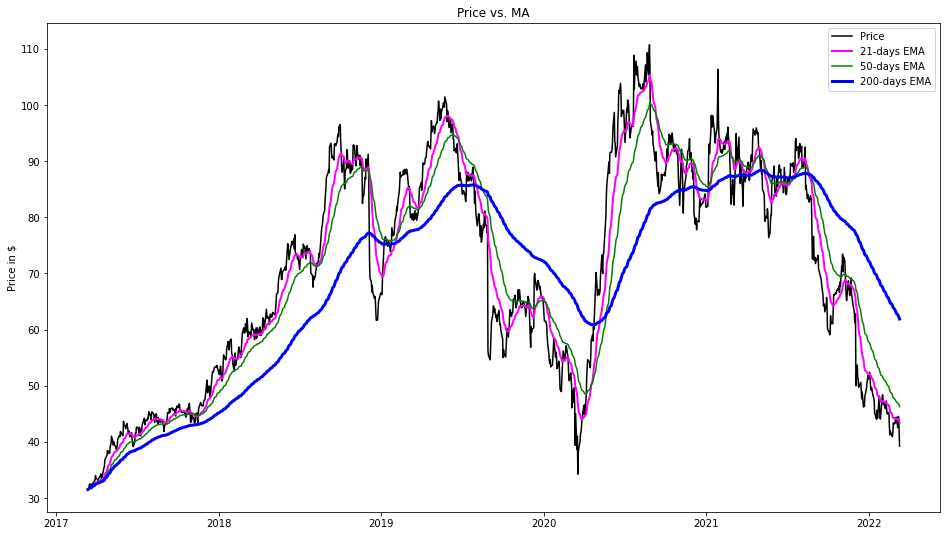

In [18]:
plotted = fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ema_df['close'], label='Price', color='black',linewidth=1.5)
ax.plot(ema_df['21EMA'], label = '21-days EMA', color='magenta',linewidth=2)
ax.plot(ema_df['50EMA'], label = '50-days EMA', color='green')
ax.plot(ema_df['200EMA'], label = '200-days EMA',color='blue',linewidth=3)


ax.legend(loc='best')
ax.title.set_text('Price vs. MA')
ax.set_ylabel('Price in $')
plotted 
# ax.xaxis.set_major_formatter(my_year_month_fmt)

In [22]:
ema_df['%_away_21'] = ((ema_df['close']- ema_df['21EMA'])/((ema_df['close']+ema_df['21EMA'])/2))*100
ema_df['%_away_50'] = ((ema_df['close']- ema_df['50EMA'])/((ema_df['close']+ema_df['50EMA'])/2))*100
ema_df['%_away_200'] = ((ema_df['close']- ema_df['200EMA'])/((ema_df['close']+ema_df['200EMA'])/2))*100

In [63]:
#Find the standard deviation of the 21EMA
ema_21std = ema_df['21EMA'].std()


#Add columns
ema_df['21std-1.5dev'] = ema_df['21EMA']-(1.5*ema_21std)
ema_df['21std+1.5dev'] = ema_df['21EMA']+(1.5*ema_21std)
ema_df

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,21std-1.5dev,21std+1.5dev
Date,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,2.738304,60.261696
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,2.764494,60.287886
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,2.846309,60.369702
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,3.030428,60.553821
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,3.200188,60.723581
...,...,...,...,...,...,...,...,...,...,...
2022-03-07,43.934066,46.920267,62.661321,42.509998,419.429993,-3.294772,-9.863035,-38.320947,15.172369,72.695762
2022-03-08,43.988241,46.826531,62.480909,44.529999,416.250000,1.224058,-5.027627,-33.549683,15.226545,72.749938
2022-03-09,44.027492,46.732158,62.301198,44.419998,427.410004,0.887546,-5.073186,-33.510119,15.265796,72.789188


(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:title={'center':'Price vs. MA'}, ylabel='Price in $'>)

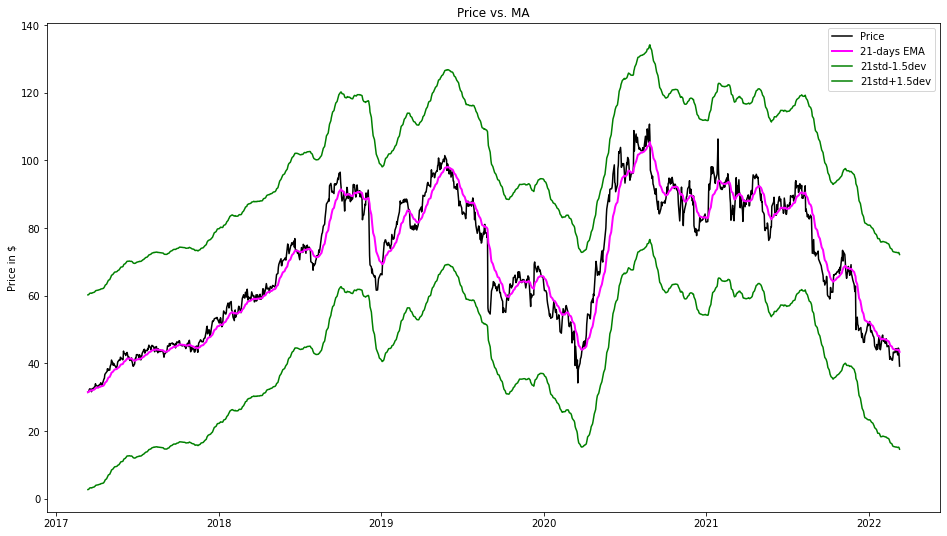

In [64]:
plotted_ticker = fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ema_df['close'], label='Price', color='black',linewidth=1.5)
ax.plot(ema_df['21EMA'], label = '21-days EMA', color='magenta',linewidth=2)
ax.plot(ema_df['21std-1.5dev'], label = '21std-1.5dev', color='green')
ax.plot(ema_df['21std+1.5dev'], label = '21std+1.5dev',color='green')


ax.legend(loc='best')
ax.title.set_text('Price vs. MA')
ax.set_ylabel('Price in $')
plotted 
# ax.xaxis.set_major_formatter(my_year_month_fmt)

In [66]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

MA_moves = ema_df.drop(columns=["21EMA","50EMA","200EMA","close","spy_close","21std-1.5dev","21std+1.5dev"])
MA_moves



,%_away_21,%_away_50,%_away_200
Date,,,
2017-03-13,0.000000,0.000000,0.000000
2017-03-14,0.075493,0.077683,0.078873
2017-03-15,0.448228,0.462972,0.470921
2017-03-16,1.429920,1.484312,1.513482
2017-03-17,1.669563,1.764043,1.815073
...,...,...,...
2022-03-07,-3.294772,-9.863035,-38.320947
2022-03-08,1.224058,-5.027627,-33.549683
2022-03-09,0.887546,-5.073186,-33.510119


In [67]:
ticker_max = MA_moves['%_away_21'].max(axis=0) 
print(f'The max % away from the 21 EMA is {ticker_max}')
ticker_min = MA_moves['%_away_21'].min(axis=0) 
print(f'The max % away from the 21 EMA is {ticker_min}')

The max % away from the 21 EMA is 21.577041682433833
The max % away from the 21 EMA is -31.725499896700377


In [68]:
# Fit the StandardScaler
scaler.fit(MA_moves)

# Scale the data
scaled_data = scaler.transform(MA_moves)

# # Create a DataFrame with the scaled data
MA_scaled = pd.DataFrame(scaled_data)
MA_scaled.index = ema_df.index

#Rename Columns
columns_MA= ["scaled_21EMA", "scaled_50EMA", "scaled_200EMA"]
MA_scaled.columns = columns_MA
MA_scaled

#This changes all values between 0-1

,scaled_21EMA,scaled_50EMA,scaled_200EMA
Date,,,
2017-03-13,0.595197,0.564663,0.597417
2017-03-14,0.596613,0.565739,0.598196
2017-03-15,0.603606,0.571071,0.602069
2017-03-16,0.622023,0.585208,0.612367
2017-03-17,0.626519,0.589079,0.615346
...,...,...,...
2022-03-07,0.533384,0.428150,0.218877
2022-03-08,0.618161,0.495077,0.266008
2022-03-09,0.611848,0.494446,0.266399


In [69]:
ema_df_final = pd.concat([ema_df, MA_scaled], axis="columns", join="inner")
ema_df_final['signal_21']=0
ema_df_final['signal_50']=0
ema_df_final['signal_200']=0
ema_df_final

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,21std-1.5dev,21std+1.5dev,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200
Date,,,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,2.738304,60.261696,0.595197,0.564663,0.597417,0,0,0
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,2.764494,60.287886,0.596613,0.565739,0.598196,0,0,0
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,2.846309,60.369702,0.603606,0.571071,0.602069,0,0,0
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,3.030428,60.553821,0.622023,0.585208,0.612367,0,0,0
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,3.200188,60.723581,0.626519,0.589079,0.615346,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,43.934066,46.920267,62.661321,42.509998,419.429993,-3.294772,-9.863035,-38.320947,15.172369,72.695762,0.533384,0.428150,0.218877,0,0,0
2022-03-08,43.988241,46.826531,62.480909,44.529999,416.250000,1.224058,-5.027627,-33.549683,15.226545,72.749938,0.618161,0.495077,0.266008,0,0,0
2022-03-09,44.027492,46.732158,62.301198,44.419998,427.410004,0.887546,-5.073186,-33.510119,15.265796,72.789188,0.611848,0.494446,0.266399,0,0,0


In [70]:
#Find the price 20 days after our signal 
ema_df_final['close+20']= ema_df_final['close'].shift(-20)
ema_df_final['spy_close+20']= ema_df_final['spy_close'].shift(-20)
ema_df_final=ema_df_final.dropna()
ema_df_final

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,21std-1.5dev,21std+1.5dev,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20
Date,,,,,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,2.738304,60.261696,0.595197,0.564663,0.597417,0,0,0,33.950001,235.339996
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,2.764494,60.287886,0.596613,0.565739,0.598196,0,0,0,34.299999,235.059998
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,2.846309,60.369702,0.603606,0.571071,0.602069,0,0,0,33.700001,234.029999
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,3.030428,60.553821,0.622023,0.585208,0.612367,0,0,0,33.299999,232.509995
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,3.200188,60.723581,0.626519,0.589079,0.615346,0,0,0,34.900002,234.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,47.186373,51.050197,66.859811,46.889999,448.700012,-0.630070,-8.495384,-35.111815,18.424676,75.948069,0.583376,0.447080,0.250577,0,0,0,42.509998,419.429993
2022-02-07,47.071248,50.849013,66.651453,45.919998,447.260010,-2.476039,-10.187176,-36.832527,18.309551,75.832944,0.548744,0.423664,0.233580,0,0,0,44.529999,416.250000
2022-02-08,46.996589,50.668659,66.448453,46.250000,450.940002,-1.601322,-9.118284,-35.845129,18.234893,75.758285,0.565155,0.438458,0.243334,0,0,0,44.419998,427.410004


In [71]:
# Generate the trading signal 1 or 0,
# where 1 is when the EMA21 is less than 0.1 (represents 10%tile)

percentile_21 = 0.13
percentile_50 = 0.13
percentile_200 = 0.13

In [72]:
ema_df_final["signal_21"]= np.where(
    ema_df_final["scaled_21EMA"] < percentile_21, 1.0, 0.0
)

ema_df_final["signal_50"]= np.where(
    ema_df_final["scaled_50EMA"] < percentile_50, 1.0, 0.0
)

ema_df_final["signal_200"]= np.where(
    ema_df_final["scaled_200EMA"] < percentile_200, 1.0, 0.0
)


ema_df_final

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,21std-1.5dev,21std+1.5dev,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20
Date,,,,,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,2.738304,60.261696,0.595197,0.564663,0.597417,0.0,0.0,0.0,33.950001,235.339996
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,2.764494,60.287886,0.596613,0.565739,0.598196,0.0,0.0,0.0,34.299999,235.059998
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,2.846309,60.369702,0.603606,0.571071,0.602069,0.0,0.0,0.0,33.700001,234.029999
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,3.030428,60.553821,0.622023,0.585208,0.612367,0.0,0.0,0.0,33.299999,232.509995
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,3.200188,60.723581,0.626519,0.589079,0.615346,0.0,0.0,0.0,34.900002,234.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,47.186373,51.050197,66.859811,46.889999,448.700012,-0.630070,-8.495384,-35.111815,18.424676,75.948069,0.583376,0.447080,0.250577,0.0,0.0,0.0,42.509998,419.429993
2022-02-07,47.071248,50.849013,66.651453,45.919998,447.260010,-2.476039,-10.187176,-36.832527,18.309551,75.832944,0.548744,0.423664,0.233580,0.0,0.0,0.0,44.529999,416.250000
2022-02-08,46.996589,50.668659,66.448453,46.250000,450.940002,-1.601322,-9.118284,-35.845129,18.234893,75.758285,0.565155,0.438458,0.243334,0.0,0.0,0.0,44.419998,427.410004


In [73]:
#Drop 20 most recent days
days_recency=20
ema_df_final_recency = ema_df_final.iloc[:-days_recency, :]
ema_df_final_recency 

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,21std-1.5dev,21std+1.5dev,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20
Date,,,,,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,2.738304,60.261696,0.595197,0.564663,0.597417,0.0,0.0,0.0,33.950001,235.339996
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,2.764494,60.287886,0.596613,0.565739,0.598196,0.0,0.0,0.0,34.299999,235.059998
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,2.846309,60.369702,0.603606,0.571071,0.602069,0.0,0.0,0.0,33.700001,234.029999
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,3.030428,60.553821,0.622023,0.585208,0.612367,0.0,0.0,0.0,33.299999,232.509995
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,3.200188,60.723581,0.626519,0.589079,0.615346,0.0,0.0,0.0,34.900002,234.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,51.566883,56.732378,71.378908,49.230000,467.940002,-4.636816,-14.160457,-36.728479,22.805186,80.328579,0.508206,0.368670,0.234608,0.0,0.0,0.0,46.889999,448.700012
2022-01-07,51.398075,56.456990,71.163296,49.709999,466.089996,-3.339152,-12.710149,-35.497166,22.636379,80.159771,0.532551,0.388744,0.246771,0.0,0.0,0.0,45.919998,447.260010
2022-01-10,51.122795,56.139854,70.936496,48.369999,465.510010,-5.533660,-14.869133,-37.829453,22.361099,79.884492,0.491381,0.358862,0.223732,0.0,0.0,0.0,46.250000,450.940002


In [74]:
ema_df_21signal = ema_df_final.loc[(ema_df_final['signal_21']==1.0),:]
ema_df_21signal_bt = ema_df_final_recency.loc[(ema_df_final_recency['signal_21']==1.0),:]

ema_df_50signal = ema_df_final.loc[(ema_df_final['signal_50']==1.0),:]
ema_df_50signal_bt = ema_df_final_recency.loc[(ema_df_final_recency['signal_50']==1.0),:]

ema_df_200signal = ema_df_final.loc[(ema_df_final['signal_200']==1.0),:]
ema_df_200signal_bt = ema_df_final_recency.loc[(ema_df_final_recency['signal_200']==1.0),:]


## Whats the average % difference when we get this 21EMA signal to the price 4 weeks after?

In [77]:
ema_df_21signal_bt['20day_%_diff']= ((ema_df_21signal_bt['close+20']- ema_df_21signal_bt['close'])/((ema_df_21signal_bt['close+20']+ema_df_21signal_bt['close'])/2))*100
mean1 = ema_df_21signal_bt['20day_%_diff'].mean()
print(f'The average % difference of our ticker 20 trading days after our 21EMA signal is {mean1}')

spy_df_21signal_bt = ema_df_21signal_bt

spy_df_21signal_bt['spy_20day_%_diff']= ((ema_df_21signal_bt['spy_close+20']- ema_df_21signal_bt['spy_close'])/((ema_df_21signal_bt['spy_close+20']+ema_df_21signal_bt['spy_close'])/2))*100
mean4 = ema_df_21signal_bt['spy_20day_%_diff'].mean()
print(f'The average % difference in the SPY 20 trading days after our 21EMA signal is {mean4}')

ema_df_21signal_bt

ema_df_50signal_bt['20day_%_diff']= ((ema_df_50signal_bt['close+20']- ema_df_50signal_bt['close'])/((ema_df_50signal_bt['close+20']+ema_df_50signal_bt['close'])/2))*100
mean2 = ema_df_50signal_bt['20day_%_diff'].mean()
print(f'The average % difference 20 trading days after our 50EMA signal is {mean2}')

ema_df_200signal_bt['20day_%_diff']= ((ema_df_200signal_bt['close+20']- ema_df_200signal_bt['close'])/((ema_df_200signal_bt['close+20']+ema_df_200signal_bt['close'])/2))*100
mean3 = ema_df_200signal_bt['20day_%_diff'].mean()
print(f'The average % difference 20 trading days after our 200EMA signal is {mean3}')

ema_df_21signal_bt


The average % difference of our ticker 20 trading days after our 21EMA signal is 13.923507750386658
The average % difference in the SPY 20 trading days after our 21EMA signal is 4.712719762462619
The average % difference 20 trading days after our 50EMA signal is 12.337938128984238
The average % difference 20 trading days after our 200EMA signal is 38.86117512113632


,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,21std-1.5dev,21std+1.5dev,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20,20day_%_diff,spy_20day_%_diff
Date,,,,,,,,,,,,,,,,,,,,
2019-08-29,77.611577,82.153317,84.176389,56.360001,292.579987,-31.725500,-37.243085,-39.586030,48.849881,106.373273,0.000000,0.049187,0.206380,1.0,1.0,0.0,59.860001,295.399994,6.023060,0.959219
2019-08-30,75.596888,81.106128,83.889990,55.450001,292.450012,-30.747601,-37.575944,-40.821001,46.835192,104.358585,0.018346,0.044580,0.194181,1.0,1.0,0.0,58.639999,296.769989,5.592074,1.466337
2019-09-03,73.688080,80.066672,83.597978,54.599998,290.739990,-29.758153,-37.821791,-41.965853,44.926384,102.449776,0.036909,0.041177,0.182872,1.0,1.0,0.0,58.400002,293.239990,6.725669,0.856194
2020-03-18,46.737442,51.803558,63.942873,34.250000,240.000000,-30.837971,-40.796822,-60.478672,17.975745,75.499138,0.016651,0.000000,0.000000,1.0,1.0,1.0,55.029999,279.100006,46.550177,15.064537
2021-12-03,64.343020,67.087993,76.942762,49.990002,453.420013,-25.107389,-29.207865,-42.467775,35.581323,93.104716,0.124161,0.160401,0.177914,1.0,0.0,0.0,52.410000,477.709991,4.726559,5.217312


In [85]:
#Find

# ticker_plot = ema_df_final[['20day_%_diff']].hvplot(
#     color='blue',
#     line_width=2,
#     width=1000,
#     height=400
# )

ticker_returns = ema_df[["%_away_21"]].hvplot(
    color='black',
    line_width=2,
    width=1000,
    height=400
)

ticker_returns_dummy = ema_df[["%_away_50"]].hvplot(
    color='blue',
    line_width=2,
    width=1000,
    height=400
)



ticker_vs_lagged_return = ticker_returns * ticker_returns_dummy
ticker_vs_lagged_return 

:Overlay
   .Curve.I  :Curve   [Date]   (%_away_21)
   .Curve.II :Curve   [Date]   (%_away_50)

In [92]:
# Visualize entry position relative to close price

#concat into one big DF. Use the  
signal_21 = spy_df_21signal_bt[spy_df_21signal_bt["signal_21"] == 1.0]["close"].hvplot.scatter(
    color="orange",
    marker="^",
    size=300,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

price_plot = ema_df_final[["close"]].hvplot(
    color='black',
    line_width=2,
    width=1000,
    height=400
)

ema_21_plot = ema_df_final[["21EMA"]].hvplot(
    color='magenta',
    line_width=2,
    width=1000,
    height=400
)

ema_50_plot = ema_df_final[["50EMA"]].hvplot(
    line_color="green",
    width=1000,
    height=400
)


ema_200_plot = ema_df_final[["200EMA"]].hvplot(
    line_color="blue",
    line_width=3,
    width=1000,
    height=400
)

    
# Overlay plots
ema_signal_plot = price_plot * signal_21 * ema_21_plot * ema_50_plot * ema_200_plot
#signal_50 * signal_200 
ema_signal_plot


:Overlay
   .Curve.I       :Curve   [Date]   (close)
   .Scatter.Close :Scatter   [Date]   (close)
   .Curve.II      :Curve   [Date]   (21EMA)
   .Curve.III     :Curve   [Date]   (50EMA)
   .Curve.IV      :Curve   [Date]   (200EMA)

In [93]:
diff_returns = ema_df_final_recency.filter(['close', 'spy_close'])
diff_returns['ticker_return']= diff_returns['close'].pct_change()
diff_returns['spy_return']= diff_returns['spy_close'].pct_change()
diff_returns['cum_ticker_return'] = diff_returns['ticker_return'].cumsum()
diff_returns['cum_spy_return'] = diff_returns['spy_return'].cumsum()
diff_returns = diff_returns.filter(['cum_ticker_return', 'cum_spy_return'])
diff_returns 

# diff_returns = ema_df_final_recency.filter(['close', 'spy_close','close+20','spy_close+20'])
# diff_returns['ticker_20day_return']= ((diff_returns['close+20']- diff_returns['close'])/((diff_returns['close+20']+diff_returns ['close'])/2))*100
# diff_returns['spy_20day_return']= ((diff_returns['spy_close+20']- diff_returns['spy_close'])/((diff_returns['spy_close+20']+diff_returns['spy_close'])/2))*100
# diff_returns = diff_returns.filter(['ticker_20day_return','spy_20day_return'])
# diff_returns['cum_ticker_return'] = diff_returns['ticker_20day_return'].cumsum()
# diff_returns['cum_spy_return'] = diff_returns['spy_20day_return'].cumsum()
# diff_returns

,cum_ticker_return,cum_spy_return
Date,,
2017-03-13,NaN,NaN
2017-03-14,0.001587,-0.003827
2017-03-15,0.007926,0.004827
2017-03-16,0.023674,0.002860
2017-03-17,0.031426,-0.003220
...,...,...
2022-01-06,0.937017,0.767026
2022-01-07,0.946767,0.763073
2022-01-10,0.919811,0.761829


In [94]:
dfnew= ema_df_21signal_bt.filter(['signal_21'])
# So add a date to my trading signal, if the column has the marker, use 1. If the column is 1, start the graph on that date.
dfnew

# ticker_return_plot = diff_returns[["cum_ticker_return"]].hvplot(
#     color='blue',
#     line_width=2,
#     width=1000,
#     height=400
# )

# spy_return_plot = diff_returns[["cum_spy_return"]].hvplot(
#     color='black',
#     line_width=2,
#     width=1000,
#     height=400
# )


    
# signal_21 = dfnew[dfnew["signal_21"] == 1.0]["Date"].hvplot.scatter(
#     color="magenta",
#     marker="^",
#     size=200,
#     legend=False,
#     ylabel="% Return",
#     width=1000,
#     height=400
# )

# comparison_plot = ticker_return_plot * spy_return_plot * signal_21
# comparison_plot



,signal_21
Date,
2019-08-29,1.0
2019-08-30,1.0
2019-09-03,1.0
2020-03-18,1.0
2021-12-03,1.0


# You need to show the difference between the date to the spy vs. ticker

# Now let's try linear regression

In [95]:
ema_df_final
df_lr_target = ema_df_final[["close","%_away_21","%_away_50","%_away_200","close+20"]]
df_lr_target["close_20return"] = ((df_lr_target['close+20']- df_lr_target['close'])/((df_lr_target['close+20']+df_lr_target['close'])/2))*100
df_lr_target.index = df_lr_target["%_away_21"]
df_lr_target.head(1)

,close,%_away_21,%_away_50,%_away_200,close+20,close_20return
%_away_21,,,,,,
0.0,31.5,0.0,0.0,0.0,33.950001,7.486633


In [96]:
df_lr_target = df_lr_target.drop(columns=["close", "%_away_21", "close+20"])
df_lr_target.head(1)

,%_away_50,%_away_200,close_20return
%_away_21,,,
0.0,0.0,0.0,7.486633


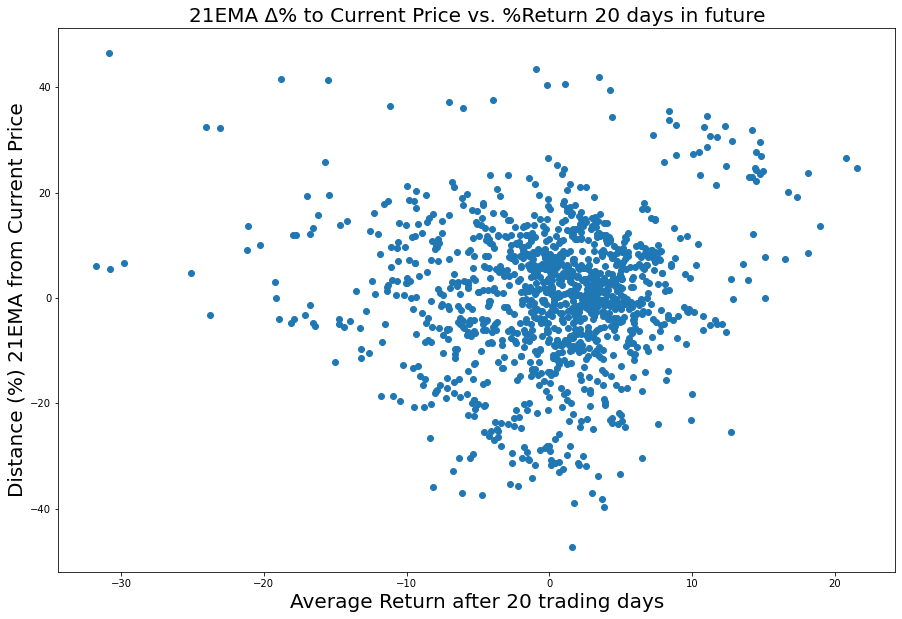

<Figure size 432x288 with 0 Axes>

In [97]:
# # Create a scatter plot of the data
plt.figure(figsize=(15,10))
plt.scatter(df_lr_target.index,df_lr_target.close_20return)
plt.title("21EMA Δ% to Current Price vs. %Return 20 days in future",fontsize=20)
plt.xlabel("Average Return after 20 trading days",fontsize=20)
plt.ylabel("Distance (%) 21EMA from Current Price",fontsize=20)
plt.show()
plt.savefig('pic.png')
#X-axis the return 20 days in the future

In [98]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df = df_lr_target

In [99]:
# Separate the data into the X and y components
# In this case, y will be the `%percentile occurence` and X will be the remaining columns
X = df.index.values.reshape(-1,1)
y = df['close_20return']

In [100]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [101]:
# # Make predictions using the X data
predicted_y_values = model.predict(X)
predicted_y_values

array([0.43340571, 0.44186959, 0.48365848, ..., 0.25387468, 0.49466762,
       0.18247295])

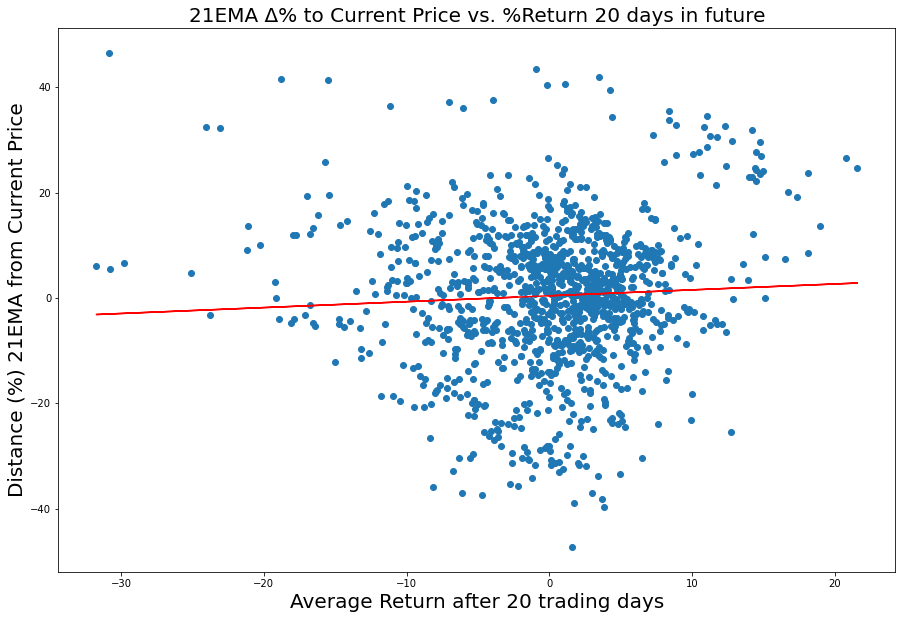

<Figure size 432x288 with 0 Axes>

In [102]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.figure(figsize=(15,10))
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')
plt.title("21EMA Δ% to Current Price vs. %Return 20 days in future",fontsize=20)
plt.xlabel("Average Return after 20 trading days",fontsize=20)
plt.ylabel("Distance (%) 21EMA from Current Price",fontsize=20)
plt.show()
plt.savefig('pic.png')

In [103]:
# # Display the coefficient
model.coef_

array([0.11211428])

In [104]:
# # Display the intercept
model.intercept_


0.43340570595488265

In [105]:
# # R2 value
model.score(X, y, sample_weight=None)

0.002936420303124687